## Load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/iwakkk/Data-Mining-Dataset/refs/heads/main/adult.csv')

df.head(5)

# Load datasaet dari url dan menampilkan 5 baris teratas

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Exploratory Data Analysis

In [4]:
df.info()

# Menampilkan info dari dataset, dari sini kita bisa tahu bahwa dataset ini tidak memiliki null values karena range index 48842 entries dan non null tiap kolom juga 48842

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

# Menampilkan overview dari dataset, kita bisa tahu jumlah, rata2, std, min, max, q1, q3 pada setiap kolom

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df['workclass'] = df['workclass'].replace('?', pd.NA)
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

df['occupation'] = df['occupation'].replace('?', pd.NA)
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

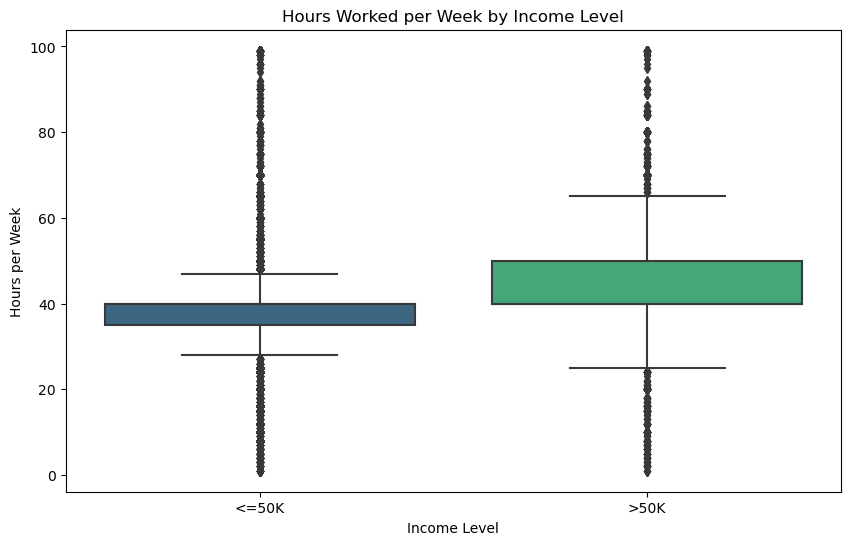

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', y='hours-per-week', palette='viridis')
plt.title('Hours Worked per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours per Week')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

# Box plot yang memvisualisasikan perbandingan hours per week dengan income level, income level yang lebih tinggi memiliki hours per week yang lebih tinggi dibandingkan income yang dibawah 50k

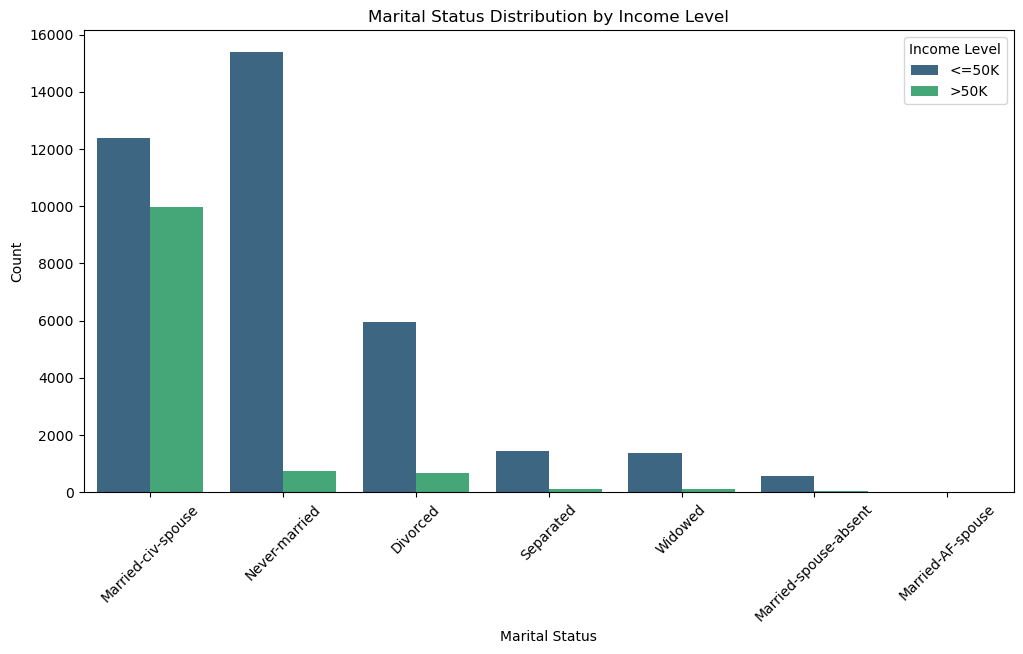

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital-status', hue='income', palette='viridis', order=df['marital-status'].value_counts().index)
plt.title('Marital Status Distribution by Income Level')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income Level')
plt.show()

# Bar chart yang menampilkan hubungan antara marital status dengan income, income dibawah 50k terbanyak adalah dari orang yang belum menikah, sedangkan income diatas 50k terbanyak adalah orang dengan married-civ-spouse

In [9]:
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])
df.sample(5)

# Mengubah value dari setiap column dari string menjadi angka menggunakan label encoder

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
36000,52,3,181755,11,9,0,0,4,4,0,0,0,40,39,0
30020,21,3,121889,15,10,4,11,3,2,0,0,0,20,39,0
7147,26,3,272865,11,9,2,2,0,4,1,0,0,40,39,0
36409,44,3,106900,11,9,2,11,0,4,1,0,0,68,39,0
17084,31,3,51471,11,9,0,0,4,4,0,0,0,38,39,0


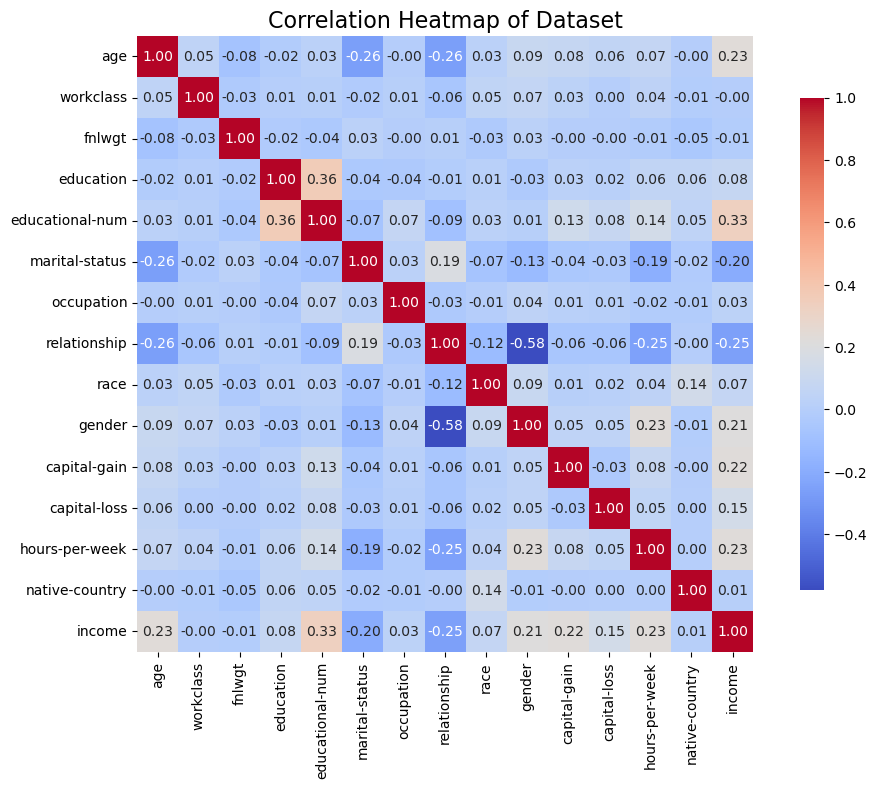

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,  cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Dataset', fontsize=16)
plt.show()

# Heatmap yang membandingkan hubungan setiap kolom dalam dataset. Hubungan terkuat adalah antara income dengan educational-num (0.33) diikuti dengan age (0.23), hours per week (0.23), gender (0.21), dan juga capital gain (0.22). Education dengan educational-nuiim juga memiliki hubungan yang kuat (0.36). Gender dengan hours per week juga memiliki hubungan yang cukup kuat (0.23). Gender dengan relationship memiliki hubungan yang terbalik ditunjukkan dengan hasil -0.58


In [11]:
X = df.drop('income',axis=1)
y = df['income']

# Membagi dataset menjadi X dan y, dimana X adalah kolom selain target (income) dan y adalah kolom targetnya (income)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Membagi data 20 persen untuk test, 80 persen untuk train, bisa dilihat dalam shape, train memiliki 39073 baris dan test memiliki 9769 baris

Shape of X_train: (39073, 14)
Shape of X_test: (9769, 14)


### Entropy

In [13]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth= 5, random_state=42)
clf_entropy.fit(X_train, y_train)

# Membuat classifier entropy untuk membuat decision tree dengan metode entropy, max depth 5 karena saat saya menggunakan 3, hasil entropy dan gini sangat mirip

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [14]:
y_pred_entropy = clf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy with Entropy: {accuracy_entropy:.4f}')

# Memasukkan y kedalam entropy untuk diprediksi dengan menggunakan model entropy dan akurasi dari model ini adalah 86% 

Accuracy with Entropy: 0.8567


In [15]:
train_set_score_en = clf_entropy.score(X_train, y_train)
test_set_score_en = clf_entropy.score(X_test, y_test)

print(f'Training set score with Entropy : {train_set_score_en}')
print(f'Test set score with Entropy : {test_set_score_en}')

# Melihat score train dan test, dari hasilnya, gap yang dimiliki antara train dengan test tidak jauh sehingga termasuk well-fitted

Training set score with Entropy : 0.8508177002021856
Test set score with Entropy : 0.8566895280990889


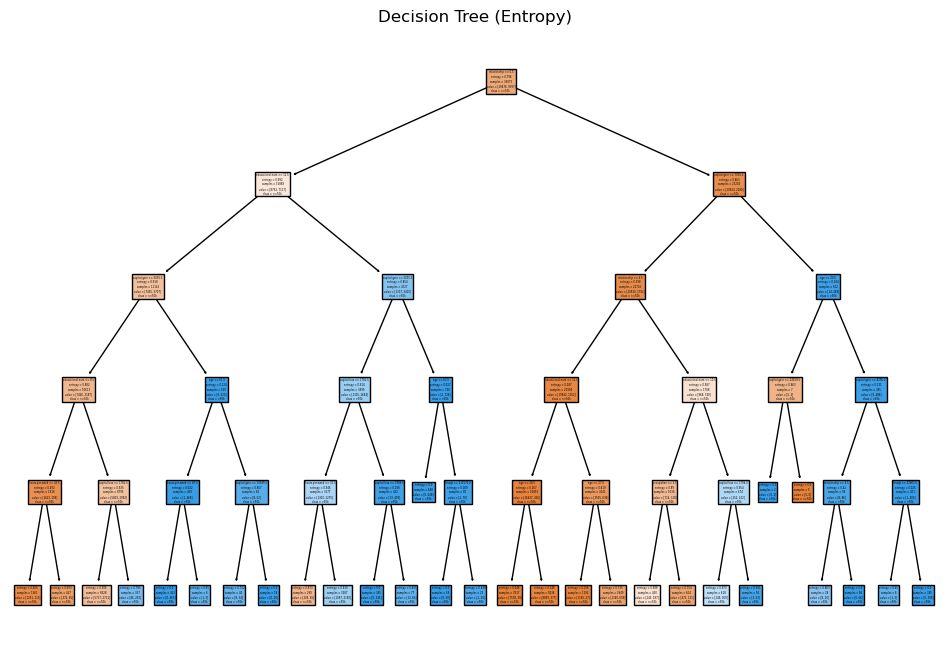

In [16]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entropy, 
               feature_names=X.columns.tolist(), 
               class_names=['<=50k', '>50k'],
               filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

# Hasil decision tree menggunakan entropy

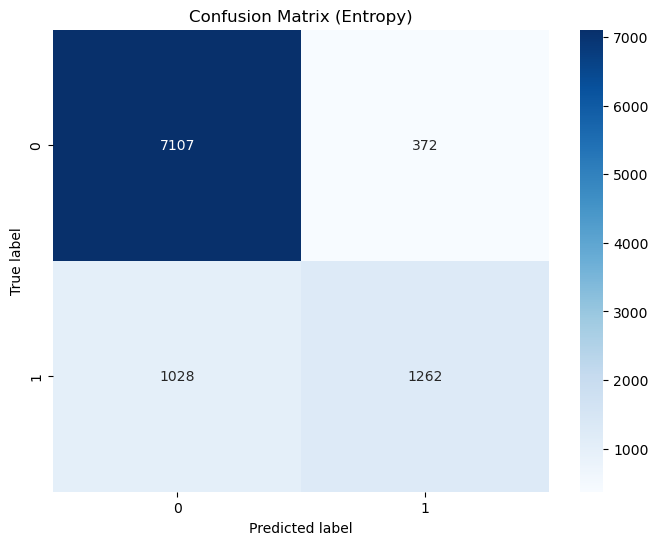

In [17]:
cm = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Hasil confusion matriks dari entropy, memiliki 8369 dari 9769 data yang diprediksi benar oleh entropy.

In [18]:
class_report_en = classification_report(y_test, y_pred_entropy)

print("Classification Report Entropy: \n", class_report_en)

# Menampilkan classification report dari entropy, accuracy yang didapat adalah 86%

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7479
           1       0.77      0.55      0.64      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



### Gini

In [19]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf_gini.fit(X_train, y_train)

# Membuat classifier gini untuk membuat decision tree dengan metode gini, sama seperti sebelumnya, max depth 5 karena saat saya menggunakan 3, hasil entropy dan gini sangat mirip

DecisionTreeClassifier(max_depth=5, random_state=42)

In [20]:
y_pred_gini = clf_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Accuracy with Gini : {accuracy_gini:4f}')

# Memasukkkan y kedalam gini dan melihat akurasi yang dimiliki 86%

Accuracy with Gini : 0.856485


In [21]:
train_set_score_gini = clf_gini.score(X_train, y_train)
test_set_score_gini = clf_gini.score(X_test, y_test)

print(f'Training set score with Gini : {train_set_score_gini}')
print(f'Test set score with Gini : {test_set_score_gini}')

# Sama dengan entropy, hasil training dan test set gini tidak memiliki perbedaan yang signifikan sehingga termasuk well-fitted


Training set score with Gini : 0.851534307578123
Test set score with Gini : 0.8564847988535162


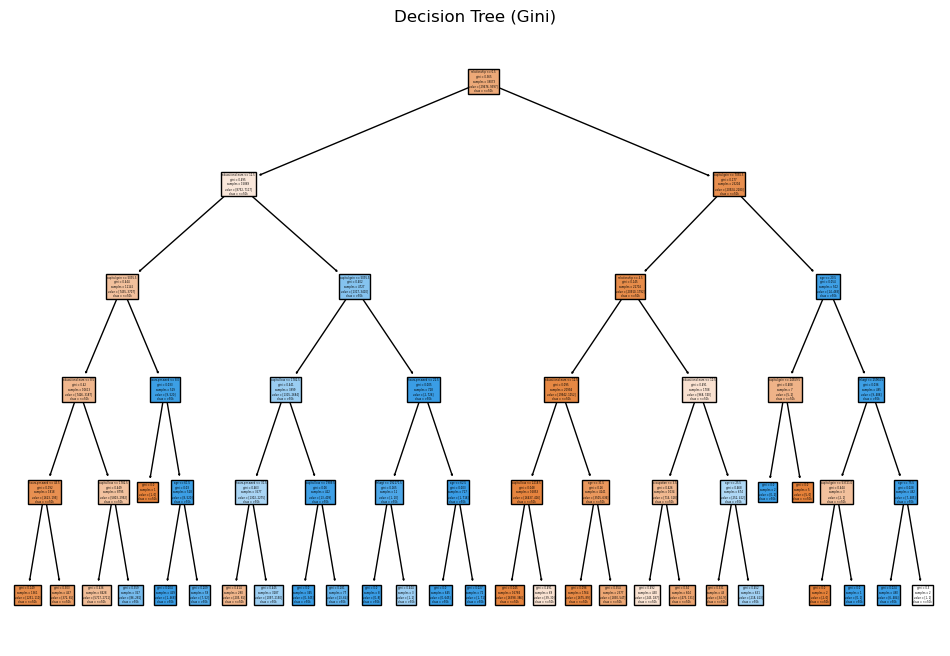

In [22]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, 
               feature_names=X.columns.tolist(), 
               class_names=['<=50k', '>50k'],
               filled=True)
plt.title("Decision Tree (Gini)")
plt.show()

# Hasil decision tree dengan menggunakan gini

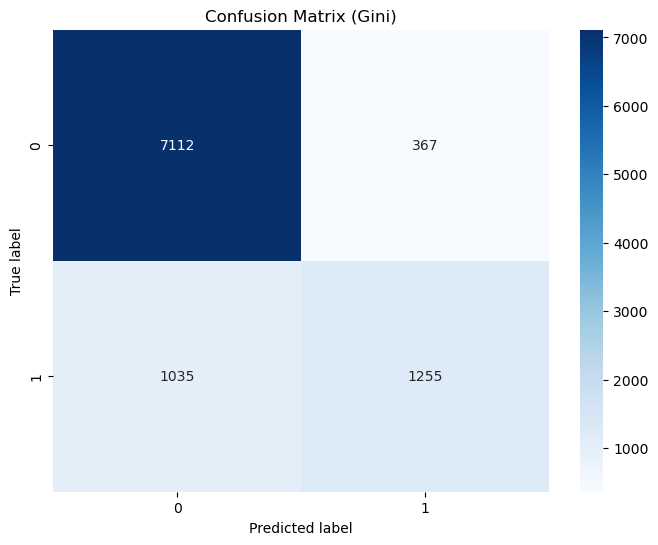

In [23]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Gini)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Confusion matriks dari gini, yang berhasil memprediksi 8367 dari 9769 data benar.

In [24]:

class_report_gini = classification_report(y_test, y_pred_gini)
print("Classification Report Gini Index: \n", class_report_gini)

# Menampilkan classification report dari gini yang memiliki akurasi 86%

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7479
           1       0.77      0.55      0.64      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



### Naive Bayes

In [25]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat model naive bayes dan memasukkan X dan y kedalam model yang sudah dibuat

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

print(f'Accuracy : {accuracy_score(y_test, y_pred_nb)}')

# Memasukkan data ke dalam mobel Naive Bayes dan mendapatkan hasil 79%


Accuracy : 0.7990582454703654


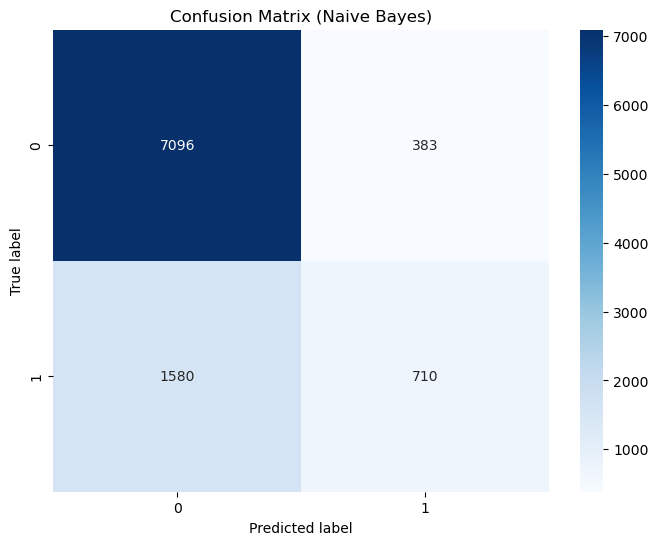

In [27]:

cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan heatmap dari modelling naive bayes dan hasilnya model ini dapat memprediksi 7806 data dari 9769 data benar

In [28]:
print(classification_report(y_test,y_pred_nb))

# Menampilkan classification report dari naive bayes yang memiliki akurasi 80%

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Modelling and fitting menggunakan metode random forest, dengan estimator 100x.

RandomForestClassifier(random_state=42)

In [30]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

# Melihat hasil prediksin dari random forest, didapat hasil akurasinya adalah 86%

Accuracy: 0.8624219469751254


In [31]:
y_train_rf = rf_classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Hasil training dan test set Random Forest memiliki perbedaan yang cukup signifikan dimana training memiliki akurasi yang jauh lebih tinggi dibandingkan dengan testing, yang menunjukkan model mengalami overfitting.

Testing accuracy: 0.8624
Training accuracy: 0.9999


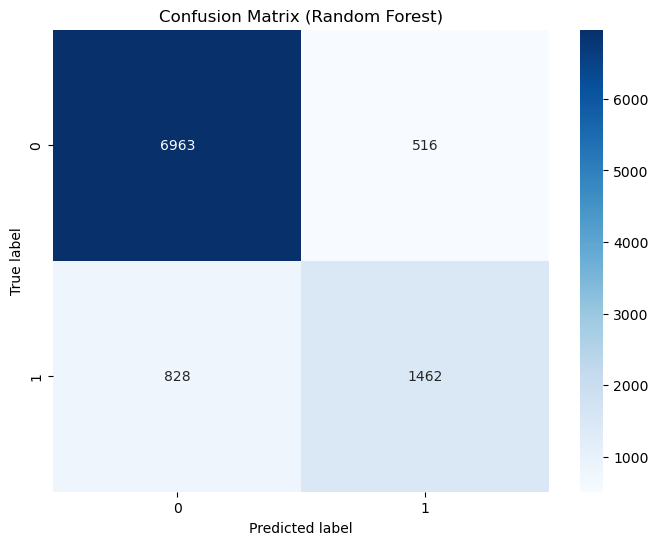

In [32]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Visualisasi heatmap dari metode Random Forest, metode ini berhasil memprediksi 8425 dari 9769 data benar.

In [33]:
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)

# Classification report dari metode Random Forest yang memiliki akurasi 86%

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [ ]:
# Dari keempat metode di atas, model yang memiliki akurasi paling tinggi adalah Entropy, Gini, dan Random Forest. Meskipun akurasinya sama, Random Forest berhasil memprediksi data sedikit lebih banyak dibandingkan dengan Entropy dan Gini, sedangkan untuk Naive Bayes, akurasi yang didapat hanyalah 80% sehingga tidak dianjurkan untuk menggunakan metode Naive Bayes pada dataset ini.